# Q-Learning (Crawling Robot)

In [1]:
from agent import Q_Agent
import numpy as np
import math
import matplotlib.pyplot as plt
from crawler_env import CrawlingRobotEnv

initial_e_greedy_prob = 0.9
all_rewards = 0
total_reward = 0
num_iterations_train = 1000
eval_iterations = 100

# Lego-Robot States and Action spaces
n_arms_state, n_hand_state = (3,3)

#### Create Environment

In [2]:
env = CrawlingRobotEnv(render=True, n_arms_state=n_arms_state, n_hand_state=n_hand_state)
current_state = env.reset()

### Action and State space

In [3]:
# Get the action space
print('Robot action space:', env.action_space.n)
print('Robot state-space:', np.prod([state.n for state in env.observation_space]))
print('Reset State:', current_state)

Robot action space: 6
Robot state-space: 9
Reset State: 4


#### Create Agent

In [13]:
agent = Q_Agent(env, gamma=0.9, alpha=0.2, e_greedy_prob=initial_e_greedy_prob)

##### Agent Internal Action-Space table

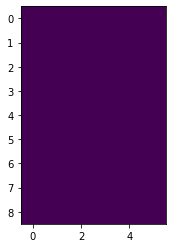

In [5]:
plt.imshow(agent.q_val_table)
plt.show()

#### Training

In [6]:
# Training
i = 0
while i < num_iterations_train:
    i = i + 1
    action = agent.choose_action(current_state)
    next_state, reward, done, info = env.step(action)
    agent.update_q_table(current_state, action, reward, next_state)
    current_state = next_state
    total_reward += reward

    # Evaluate
    if i % eval_iterations == 0:
        print("average_reward in last 1 steps", total_reward / i)
        # Stop training if total reward is big enough
        if (total_reward / i) > 2.0:
            break
        average_reward = 0
        env.render = False

average_reward in last 1 steps -0.2860139687263995
average_reward in last 1 steps 0.20253744956397837
average_reward in last 1 steps 0.3332503727397117
average_reward in last 1 steps 0.6605961949777595
average_reward in last 1 steps 0.857003688320588
average_reward in last 1 steps 1.0117765146096738
average_reward in last 1 steps 1.1223285333875919
average_reward in last 1 steps 1.0623977846482389
average_reward in last 1 steps 1.0449036372692708
average_reward in last 1 steps 1.1020230818744572


#### Action-Space after training

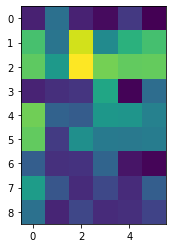

In [7]:
plt.imshow(agent.q_val_table)
plt.show()

#### Evaluate

In [8]:
# Evaluating
env = CrawlingRobotEnv(render=True, n_arms_state=n_arms_state, n_hand_state=n_hand_state)
current_state=env.reset()
total_reward = 0
# Force epsilon-greedy to always use the max Q
agent.e_greedy_prob = 0

for i in range(100):
    action = agent.choose_action(current_state)
    next_state, reward, done, info = env.step(action)
    current_state = next_state
    total_reward += reward

#### Attention, possible bug defining lists of lists

In [9]:
#test = [[0.,0.,0.,0.], [0.,0.,0.,0.], [0.,0.,0.,0.], [0.,0.,0.,0.]]
#test = [[0.]*4]*4
test = [[0.] * 4 for _ in range(4)]

In [10]:
test

[[0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0]]

In [11]:
test[0][3] = 19.8

In [12]:
test

[[0.0, 0.0, 0.0, 19.8],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0]]

### Exponential Decay
$$ y=a(1-b)^x $$

In [14]:
def exp_decay(value, decay_factor):
    y = value * (1-decay_factor)
    return y

In [15]:
value = 100
value = exp_decay(value,0.5)